**IMPORTATION DES PACKAGES**

In [64]:
# pip install pandas
import pandas as pd
# pip install numpy
import numpy as np
# pip install matplotlib
import matplotlib.pyplot as plt
# pip install missingno : pour le traitement des valeurs manquantes
import missingno as msno
# pip install pycountry
import pycountry
# pip install pycountry_convert
import pycountry_convert as pc
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
# pip install seaborn
import seaborn as sns
# pip install sklearn
from sklearn.impute import KNNImputer # imputer les valeurs manquantes

**EXTRACTION DES DATAFRAMES**

In [65]:
df1 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2019Q1.csv")
df2 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2019Q2.csv", skiprows = 4)
df3 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2019Q3.csv", skiprows = 4)
df4 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2019Q4.csv", skiprows = 4)
df5 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2020Q1.csv", skiprows = 4)
df6 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2020Q2.csv", skiprows = 4)
df7 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2020Q3.csv", skiprows = 4)
df8 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2020Q4.csv", skiprows = 4)
df9 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2021Q1.csv", skiprows = 4)
df10 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2021Q2.csv", skiprows = 4)
df11 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2021Q3.csv", skiprows = 4)
df12 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2021Q4.csv")
df13 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2022Q2.csv", skiprows = 4)
df14 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2022Q3.csv", skiprows = 4)
df15 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2022Q4.csv", skiprows = 4)
df16 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2023Q1.csv", skiprows = 4)
df17 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2023Q2.csv", skiprows = 4)
df18 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2023Q3.csv", skiprows = 4)
df19 = pd.read_csv("C:/Users/HanSAriEle/OneDrives/Documents/PROJET TUTORE 2 (QUALITY OF AIR)/waqi-covid19-airqualitydata-2023Q4.csv", skiprows = 4)

In [66]:
import requests

url = "https://aqicn.org/data-platform/covid19/report/42614-610bdcd7/2024"
output_file = "waqi-covid-2024.csv"

try:
    response = requests.get(url, headers={"Accept-Encoding": "gzip"})
    response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
    with open(output_file, 'wb') as file:
        file.write(response.content)
    print(f"File saved as {output_file}")
except requests.exceptions.RequestException as e:
    print("Error fetching data:", e)

File saved as waqi-covid-2024.csv


In [67]:
df20 = pd.read_csv("waqi-covid-2024.csv", skiprows=4)
df20.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2024-01-06,DK,Copenhagen,wind-gust,10,3.7,14.7,7.0,207.88
1,2024-01-08,DK,Copenhagen,wind-gust,4,11.5,13.6,11.5,14.70
2,2024-01-16,DK,Copenhagen,wind-gust,4,4.3,5.0,4.3,1.63
3,2024-04-21,DK,Copenhagen,wind-gust,2,6.0,6.0,6.0,0.00
4,2024-05-20,DK,Copenhagen,wind-gust,10,3.0,7.0,6.0,23.40


**CONSTRUCTION DE LA BASE DE DONNEE ET NETTOYAGE**

In [68]:
all_dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]

filtered_dfs = [df for df in all_dfs]

# Concaténer les DataFrames restants
df_combined = pd.concat(filtered_dfs)

df_combined = df_combined

df_combined.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')

In [69]:
pays_a_filtrer = ['ET', 'RU', 'ZA', 'ES', 'BR', 'GH', 'CO', 'PT', 'AU']

df_combined = df_combined[df_combined['Country'].isin(pays_a_filtrer)]

df_combined.head()

,Date,Country,City,Specie,count,min,max,median,variance
47090,2019-03-07,BR,São José dos Campos,pm25,92,5.0,114.0,42.0,5290.22
47091,2019-01-08,BR,São José dos Campos,pm25,93,13.0,93.0,46.0,4324.91
47092,2019-02-03,BR,São José dos Campos,pm25,91,5.0,82.0,50.0,3113.92
47093,2019-02-09,BR,São José dos Campos,pm25,96,5.0,80.0,53.0,2993.53
47094,2019-02-27,BR,São José dos Campos,pm25,69,5.0,65.0,30.0,1823.52


In [70]:
# Conversion de la colonne 'Date' en datetime
df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')

# Suppression des lignes de l'année 2018
df_combined = df_combined[df_combined['Date'].dt.year != 2018]

# Vérification si les lignes de l'année 2018 ont été supprimées
rows_2018 = df_combined[df_combined['Date'].dt.year == 2018]

if not rows_2018.empty:
    print("Il reste encore des lignes de l'année 2018 dans le DataFrame.")
else:
    print("Toutes les lignes de l'année 2018 ont été supprimées du DataFrame.")

Toutes les lignes de l'année 2018 ont été supprimées du DataFrame.


In [71]:
# Dictionnaire pour stocker les noms de pays
country_names = {}

# Dictionnaire de mapping des codes de continent à leur nom
continent_mapping = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Oceania',
    'AN': 'Antarctica'
}

# Obtenir les noms des pays à partir des codes
for code in pays_a_filtrer:
    country = pycountry.countries.get(alpha_2=code)
    if country:
        country_names[code] = country.name
    else:
        country_names[code] = "Unknown"  # Si le code n'est pas trouvé

# Créer une fonction pour mapper les codes de pays aux noms de pays
def get_country_name(code):
    return country_names.get(code, "Unknown")

def get_continent_name(code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return "Unknown"


def get_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_mapping[continent_code]
    except KeyError:
        return 'Unknown'
        
# Renommer la colonne 'Country' en 'Country_Code'
df_combined.rename(columns={'Country': 'Country_Code'}, inplace=True)

# Ajouter une nouvelle colonne 'Country_Name' au DataFrame avec les noms des pays
df_combined['Country_Name'] = df_combined['Country_Code'].apply(get_country_name)

# Ajout de la colonne de continent au DataFrame
df_combined['Continent'] = df_combined['Country_Code'].apply(get_continent)

# Réinitialiser l'index pour qu'il commence à 0
df_combined.reset_index(drop=True, inplace=True)

df_combined.head()

,Date,Country_Code,City,Specie,count,min,max,median,variance,Country_Name,Continent
0,2019-03-07,BR,São José dos Campos,pm25,92,5.0,114.0,42.0,5290.22,Brazil,South America
1,2019-01-08,BR,São José dos Campos,pm25,93,13.0,93.0,46.0,4324.91,Brazil,South America
2,2019-02-03,BR,São José dos Campos,pm25,91,5.0,82.0,50.0,3113.92,Brazil,South America
3,2019-02-09,BR,São José dos Campos,pm25,96,5.0,80.0,53.0,2993.53,Brazil,South America
4,2019-02-27,BR,São José dos Campos,pm25,69,5.0,65.0,30.0,1823.52,Brazil,South America


In [72]:
df_combined.to_csv("database_air_quality_true.csv.gz", index=False,compression='gzip', encoding='utf-8')

In [8]:
# Transformer le DataFrame pour avoir chaque espèce comme colonne
pivot_data = df_combined.pivot_table(index=['Date', 'City','Country_Name', 'Continent'], columns='Specie', values='median').reset_index()

In [9]:
pivot_data.head()

Specie,Date,City,Country_Name,Continent,aqi,co,dew,humidity,neph,no2,...,pm25,precipitation,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed
0,2019-01-01,Addis Ababa,Ethiopia,Africa,NaN,NaN,NaN,33.0,NaN,NaN,...,38.0,NaN,1029.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,Adelaide,Australia,Oceania,NaN,0.1,8.0,32.5,NaN,0.1,...,6.0,NaN,1012.2,0.1,23.6,NaN,NaN,NaN,5.9,2.2
2,2019-01-01,Barcelona,Spain,Europe,NaN,NaN,5.5,78.0,NaN,17.0,...,NaN,NaN,1028.8,4.6,10.2,NaN,NaN,NaN,3.0,1.3
3,2019-01-01,Bilbao,Spain,Europe,NaN,0.1,3.5,77.5,NaN,12.8,...,68.0,NaN,1028.5,4.0,7.8,NaN,NaN,NaN,0.6,1.0
4,2019-01-01,Bogotá,Colombia,South America,NaN,4.6,5.0,0.0,NaN,2.3,...,34.0,NaN,0.0,0.3,0.0,0.0,NaN,NaN,12.3,0.0


In [10]:
pivot_data = pivot_data.drop(columns = ['wd','wind gust', 'wind speed', 'precipitation', 'pressure', 'temperature', 'wind-gust', 'wind-speed','humidity', 'dew'])

In [11]:
pivot_data.head()

Specie,Date,City,Country_Name,Continent,aqi,co,neph,no2,o3,pm10,pm25,so2
0,2019-01-01,Addis Ababa,Ethiopia,Africa,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN
1,2019-01-01,Adelaide,Australia,Oceania,NaN,0.1,NaN,0.1,0.0,7.0,6.0,0.1
2,2019-01-01,Barcelona,Spain,Europe,NaN,NaN,NaN,17.0,4.9,27.0,NaN,4.6
3,2019-01-01,Bilbao,Spain,Europe,NaN,0.1,NaN,12.8,3.3,23.0,68.0,4.0
4,2019-01-01,Bogotá,Colombia,South America,NaN,4.6,NaN,2.3,8.3,17.0,34.0,0.3


In [12]:
polluants = ['co', 'neph', 'no2', 'o3', 'pm10', 'pm25', 'so2']
pivot_data['aqi'] = pivot_data[polluants].max(axis=1)

In [13]:
pivot_data.head()

Specie,Date,City,Country_Name,Continent,aqi,co,neph,no2,o3,pm10,pm25,so2
0,2019-01-01,Addis Ababa,Ethiopia,Africa,38.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN
1,2019-01-01,Adelaide,Australia,Oceania,7.0,0.1,NaN,0.1,0.0,7.0,6.0,0.1
2,2019-01-01,Barcelona,Spain,Europe,27.0,NaN,NaN,17.0,4.9,27.0,NaN,4.6
3,2019-01-01,Bilbao,Spain,Europe,68.0,0.1,NaN,12.8,3.3,23.0,68.0,4.0
4,2019-01-01,Bogotá,Colombia,South America,34.0,4.6,NaN,2.3,8.3,17.0,34.0,0.3


In [14]:
# Définir les intervalles et les labels correspondants
bins = [0, 50, 100, 150, 200, 300, np.inf]
labels = ['Bon', 'Modéré', 'Mauvais pour les groupes sensibles', 'Mauvais', 'Très mauvais', 'Dangereux']

# Créer la nouvelle colonne 'Categorie'
pivot_data['Categorie'] = pd.cut(pivot_data['aqi'], bins=bins, labels=labels, right=False)

In [15]:
pivot_data.head()

Specie,Date,City,Country_Name,Continent,aqi,co,neph,no2,o3,pm10,pm25,so2,Categorie
0,2019-01-01,Addis Ababa,Ethiopia,Africa,38.0,NaN,NaN,NaN,NaN,NaN,38.0,NaN,Bon
1,2019-01-01,Adelaide,Australia,Oceania,7.0,0.1,NaN,0.1,0.0,7.0,6.0,0.1,Bon
2,2019-01-01,Barcelona,Spain,Europe,27.0,NaN,NaN,17.0,4.9,27.0,NaN,4.6,Bon
3,2019-01-01,Bilbao,Spain,Europe,68.0,0.1,NaN,12.8,3.3,23.0,68.0,4.0,Modéré
4,2019-01-01,Bogotá,Colombia,South America,34.0,4.6,NaN,2.3,8.3,17.0,34.0,0.3,Bon


**TRAITEMENT DES VALEURS MANQUANTES**

In [17]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101227 entries, 0 to 101226
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          101227 non-null  datetime64[ns]
 1   City          101227 non-null  object        
 2   Country_Name  101227 non-null  object        
 3   Continent     101227 non-null  object        
 4   aqi           99410 non-null   float64       
 5   co            67555 non-null   float64       
 6   neph          2950 non-null    float64       
 7   no2           87965 non-null   float64       
 8   o3            77999 non-null   float64       
 9   pm10          93369 non-null   float64       
 10  pm25          83482 non-null   float64       
 11  so2           84256 non-null   float64       
 12  Categorie     99410 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(8), object(3)
memory usage: 9.4+ MB


In [18]:
pivot_data.isnull().sum()

Specie
Date                0
City                0
Country_Name        0
Continent           0
aqi              1817
co              33672
neph            98277
no2             13262
o3              23228
pm10             7858
pm25            17745
so2             16971
Categorie        1817
dtype: int64

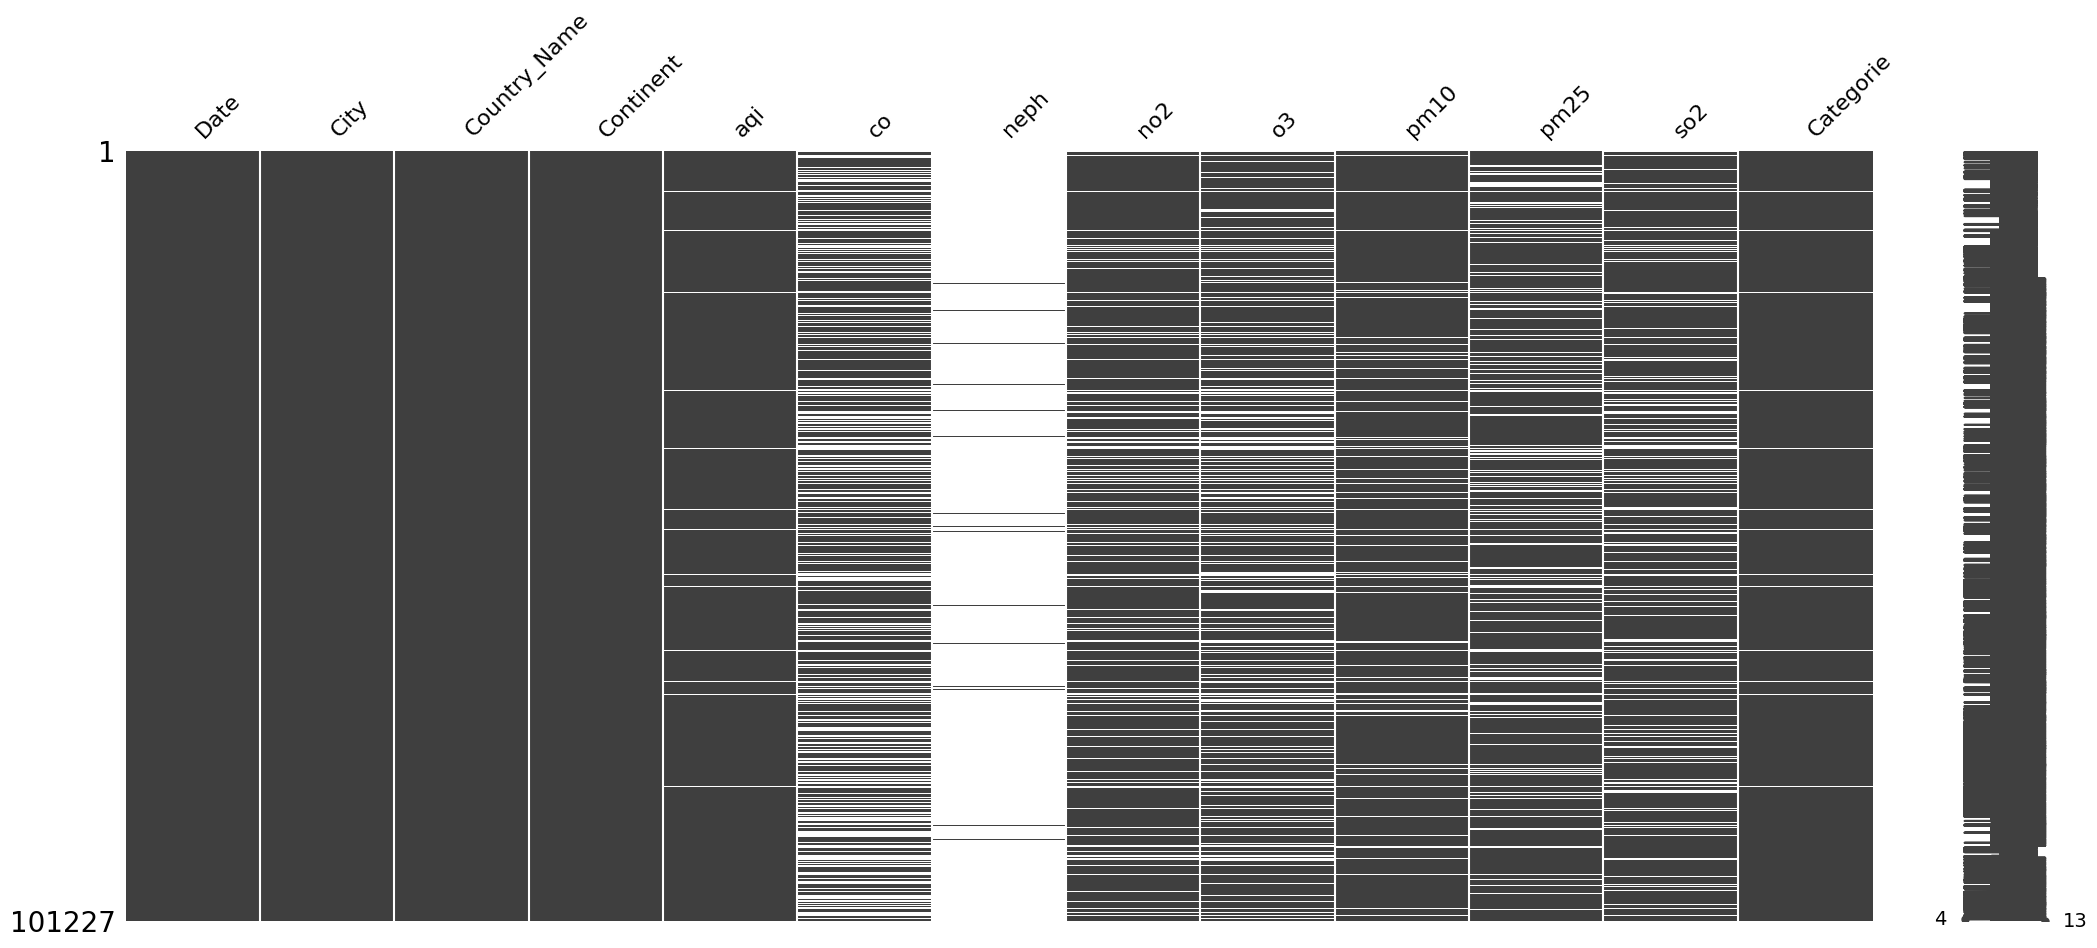

In [16]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(pivot_data)
plt.show()

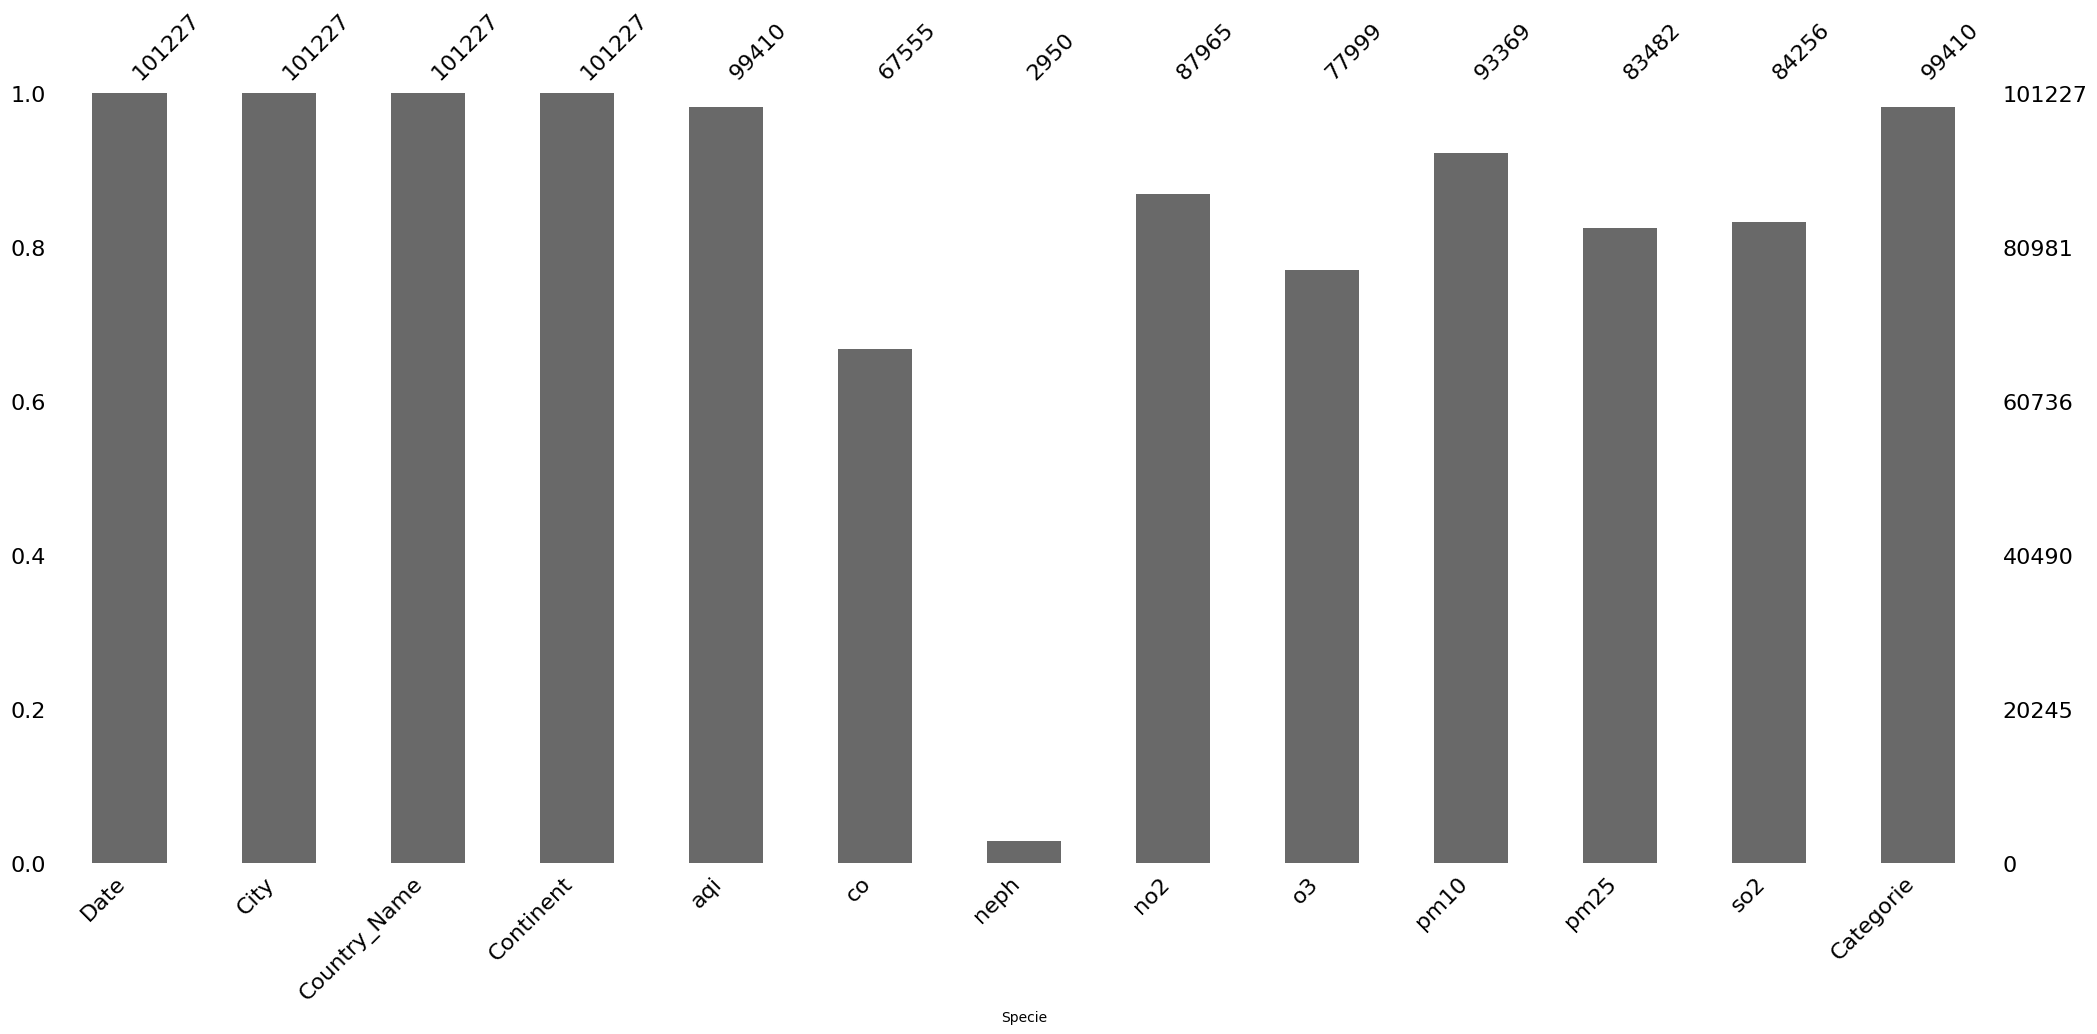

In [19]:
msno.bar(pivot_data)
plt.show()

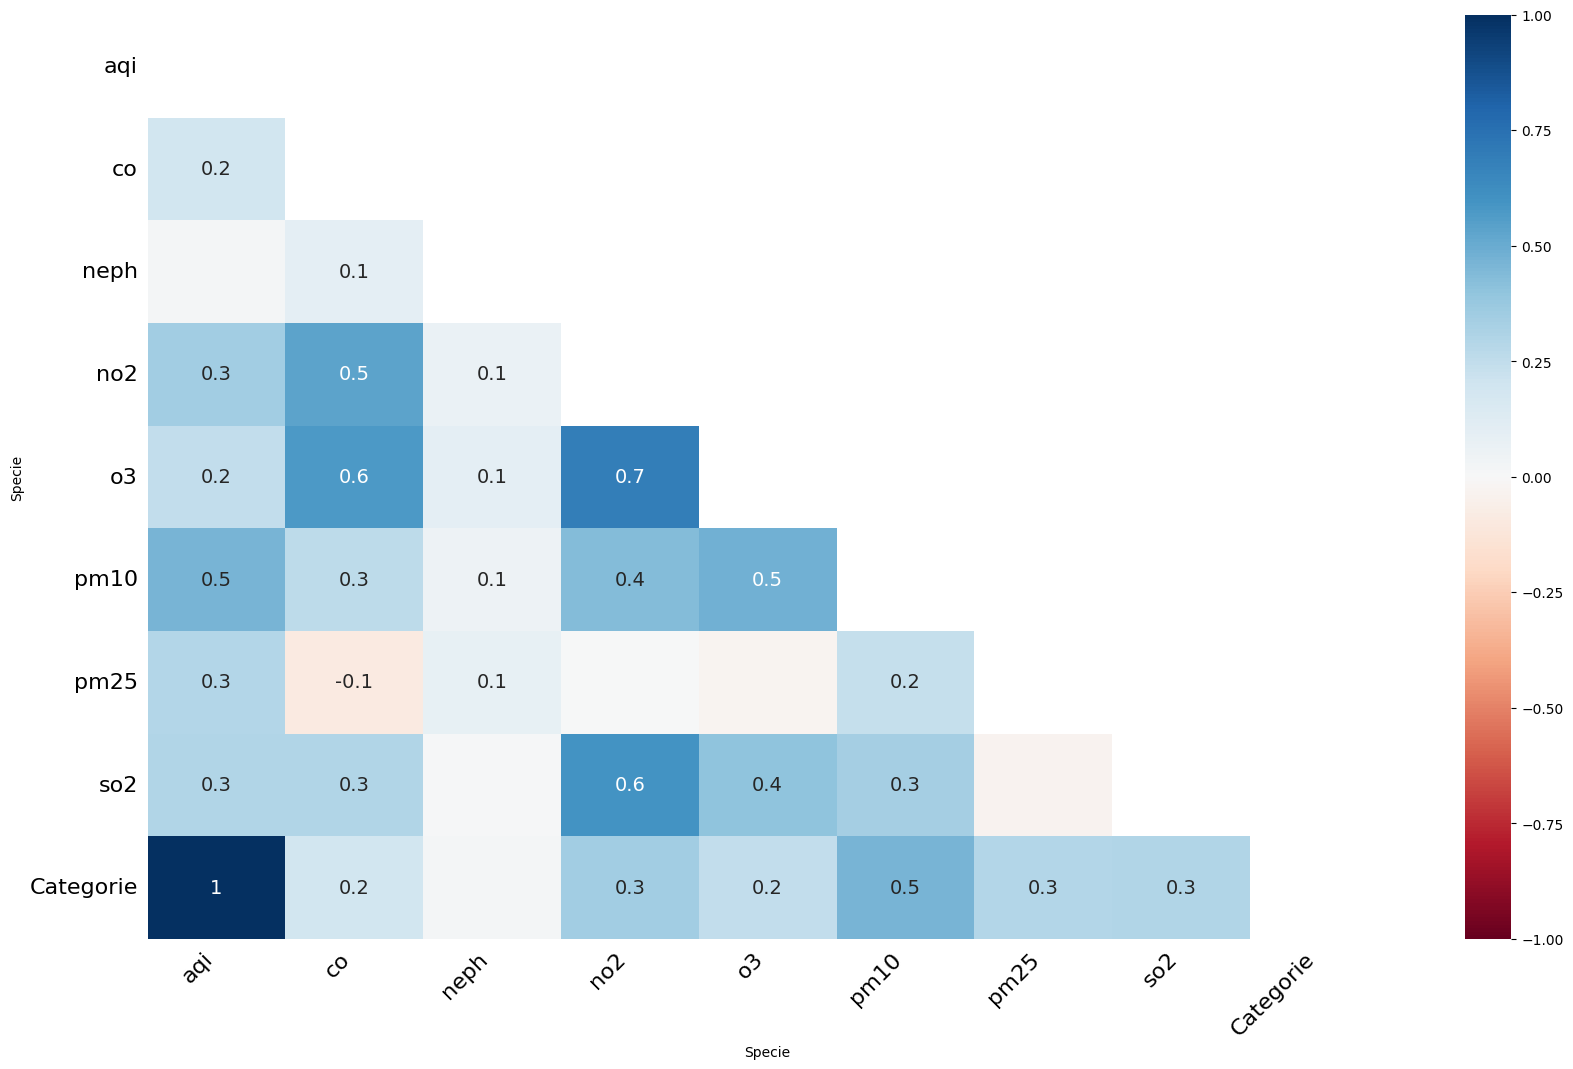

In [20]:
msno.heatmap(pivot_data)
plt.show()

In [8]:
df_combined['Country_Name'].unique()

array(['Brazil', 'Russian Federation', 'Spain', 'Ethiopia', 'Australia',
       'Portugal', 'South Africa', 'Colombia', 'Ghana'], dtype=object)

In [21]:
# Tableau des valeurs manquantes par colonne
missing_values = pivot_data.isnull().sum()
missing_percent = (missing_values / len(pivot_data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

              Missing Values  Percentage
Specie                                  
Date                       0    0.000000
City                       0    0.000000
Country_Name               0    0.000000
Continent                  0    0.000000
aqi                     1817    1.794976
co                     33672   33.263853
neph                   98277   97.085758
no2                    13262   13.101248
o3                     23228   22.946447
pm10                    7858    7.762751
pm25                   17745   17.529908
so2                    16971   16.765290
Categorie               1817    1.794976


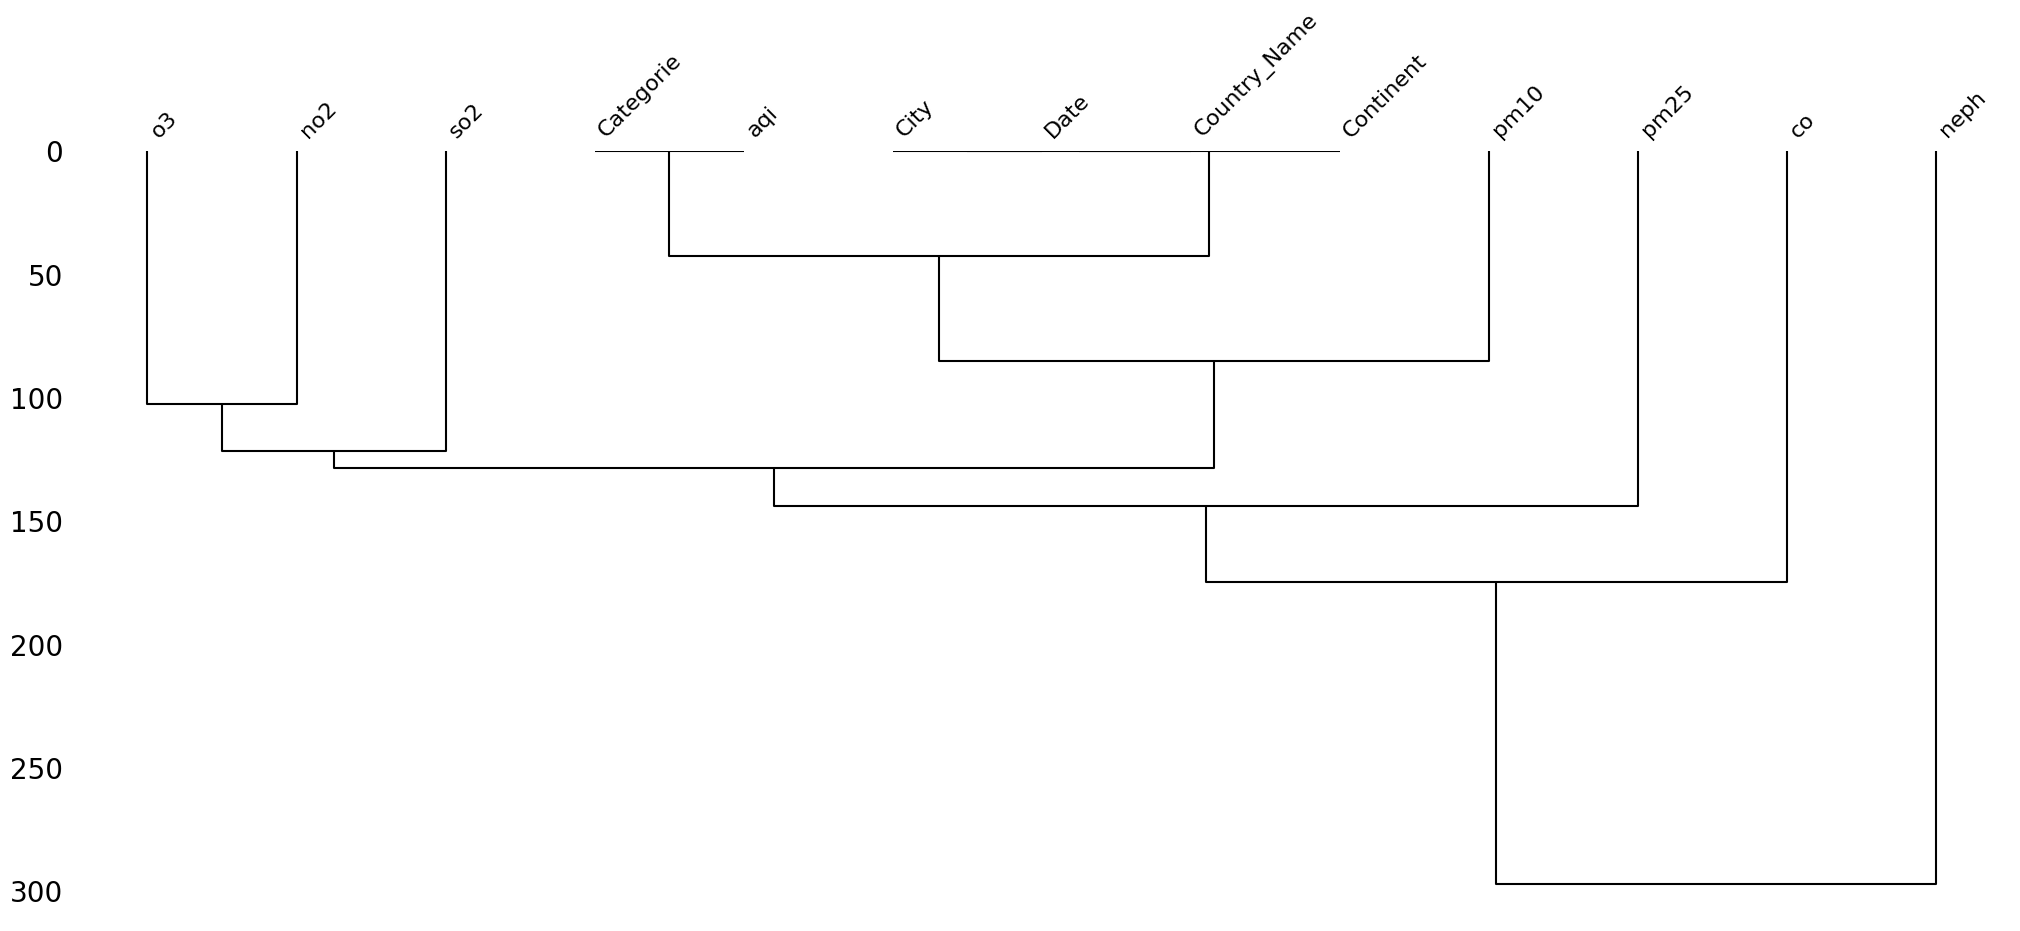

In [22]:
# Analyser la corrélation entre les valeurs manquantes
msno.dendrogram(pivot_data)
plt.show()

**APPLICATION DU KNN IMPUTER POUR LE TRAITEMENT DES VALEURS MANQUANTES**

L'algorithme KNNImputer de scikit-learn est une méthode d'imputation des valeurs manquantes basée sur les k plus proches voisins. Il s'agit d'une approche non-paramétrique qui utilise les valeurs des k plus proches voisins pour imputer les valeurs manquantes.

L'algorithme fonctionne en plusieurs étapes :

Définir la valeur de k, qui représente le nombre de voisins les plus proches à considérer pour l'imputation.

Pour chaque valeur manquante, trouver les k plus proches voisins parmi les autres observations qui ont des valeurs non manquantes pour la variable en question. La distance entre les observations peut être mesurée de différentes manières, telles que la distance euclidienne ou la distance de Manhattan.

Imputer la valeur manquante par la valeur moyenne ou médiane des k voisins les plus proches.

In [50]:
columns_to_impute = ['aqi', 'co', 'neph', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Créer une instance de KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Imputer les valeurs manquantes
pivot_data[columns_to_impute] = imputer.fit_transform(pivot_data[columns_to_impute])

In [51]:
# Créer la nouvelle colonne 'Categorie'
pivot_data['Categorie'] = pd.cut(pivot_data['aqi'], bins=bins, labels=labels, right=False)

In [52]:
pivot_data.isnull().sum()

Specie
Date            0
City            0
Country_Name    0
Continent       0
aqi             0
co              0
neph            0
no2             0
o3              0
pm10            0
pm25            0
so2             0
Categorie       0
dtype: int64

**QUELQUES STATS DESCRIPTIVESS**

In [53]:
numeric_data = pivot_data.select_dtypes(include=[np.number])
numeric_data.describe(include = 'all')

Specie,aqi,co,neph,no2,o3,pm10,pm25,so2
count,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000,101227.000000
mean,37.389683,2.427366,15.697583,6.432336,16.615007,19.398040,35.495872,2.088418
std,25.943097,4.440273,13.599923,5.165017,10.197773,15.082294,26.600233,2.588326
min,0.100000,0.100000,0.000000,0.100000,0.000000,1.000000,1.000000,0.100000
25%,21.200000,0.100000,6.000000,2.966667,8.266667,10.000000,18.000000,1.100000
50%,30.900000,1.300000,10.666667,5.100000,15.566667,16.000000,29.000000,1.600000
75%,48.000000,3.000000,22.333333,8.300000,24.300000,24.000000,47.000000,2.500000
max,999.000000,500.000000,255.000000,173.000000,500.000000,741.000000,999.000000,148.800000


In [54]:
pivot_data.shape

(101227, 13)

In [55]:
pivot_data['Country_Name'].nunique()

9

In [56]:
pivot_data.columns

Index(['Date', 'City', 'Country_Name', 'Continent', 'aqi', 'co', 'neph', 'no2',
       'o3', 'pm10', 'pm25', 'so2', 'Categorie'],
      dtype='object', name='Specie')

In [57]:
pivot_data['Continent'].unique()

array(['Africa', 'Oceania', 'Europe', 'South America'], dtype=object)

In [58]:
pivot_data['Country_Name'].unique()

array(['Ethiopia', 'Australia', 'Spain', 'Colombia', 'Portugal',
       'South Africa', 'Russian Federation', 'Brazil', 'Ghana'],
      dtype=object)

In [59]:
total_cities = 0

for country in pivot_data['Country_Name'].unique():
    cities = pivot_data.loc[pivot_data['Country_Name'] == country, 'City'].unique()
    num_cities = len(cities)
    total_cities += num_cities
    print(f"{country} ({num_cities} villes) : {', '.join(cities)}")

print(f"\nNombre total de villes : {total_cities}")

Ethiopia (1 villes) : Addis Ababa
Australia (11 villes) : Adelaide, Brisbane, Darwin, Hobart, Launceston, Melbourne, Newcastle, Perth, Sydney, Wollongong, Canberra
Spain (23 villes) : Barcelona, Bilbao, Burgos, Castelló de la Plana, Córdoba, Donostia / San Sebastián, Gasteiz / Vitoria, Granada, Huelva, Las Palmas de Gran Canaria, Madrid, Murcia, Málaga, Oviedo, Palma, Pamplona, Salamanca, Santa Cruz de Tenerife, Santander, Sevilla, Valencia, Valladolid, Zaragoza
Colombia (2 villes) : Bogotá, Medellín
Portugal (2 villes) : Funchal, Lisbon
South Africa (12 villes) : Johannesburg, Klerksdorp, Middelburg, Port Elizabeth, Pretoria, Richards Bay, Vereeniging, East London, Cape Town, Worcester, Bloemfontein, Durban
Russian Federation (7 villes) : Moscow, Krasnoyarsk, Chelyabinsk, Novosibirsk, Tomsk, Nizhniy Novgorod, Saint Petersburg
Brazil (3 villes) : São José dos Campos, São Paulo, Vitória
Ghana (1 villes) : Accra

Nombre total de villes : 62


In [60]:
pivot_data.head()

Specie,Date,City,Country_Name,Continent,aqi,co,neph,no2,o3,pm10,pm25,so2,Categorie
0,2019-01-01,Addis Ababa,Ethiopia,Africa,38.0,1.933333,23.333333,7.333333,16.533333,15.333333,38.000000,1.266667,Bon
1,2019-01-01,Adelaide,Australia,Oceania,7.0,0.100000,3.666667,0.100000,0.000000,7.000000,6.000000,0.100000,Bon
2,2019-01-01,Barcelona,Spain,Europe,27.0,0.100000,9.666667,17.000000,4.900000,27.000000,27.666667,4.600000,Bon
3,2019-01-01,Bilbao,Spain,Europe,68.0,0.100000,39.000000,12.800000,3.300000,23.000000,68.000000,4.000000,Modéré
4,2019-01-01,Bogotá,Colombia,South America,34.0,4.600000,8.666667,2.300000,8.300000,17.000000,34.000000,0.300000,Bon


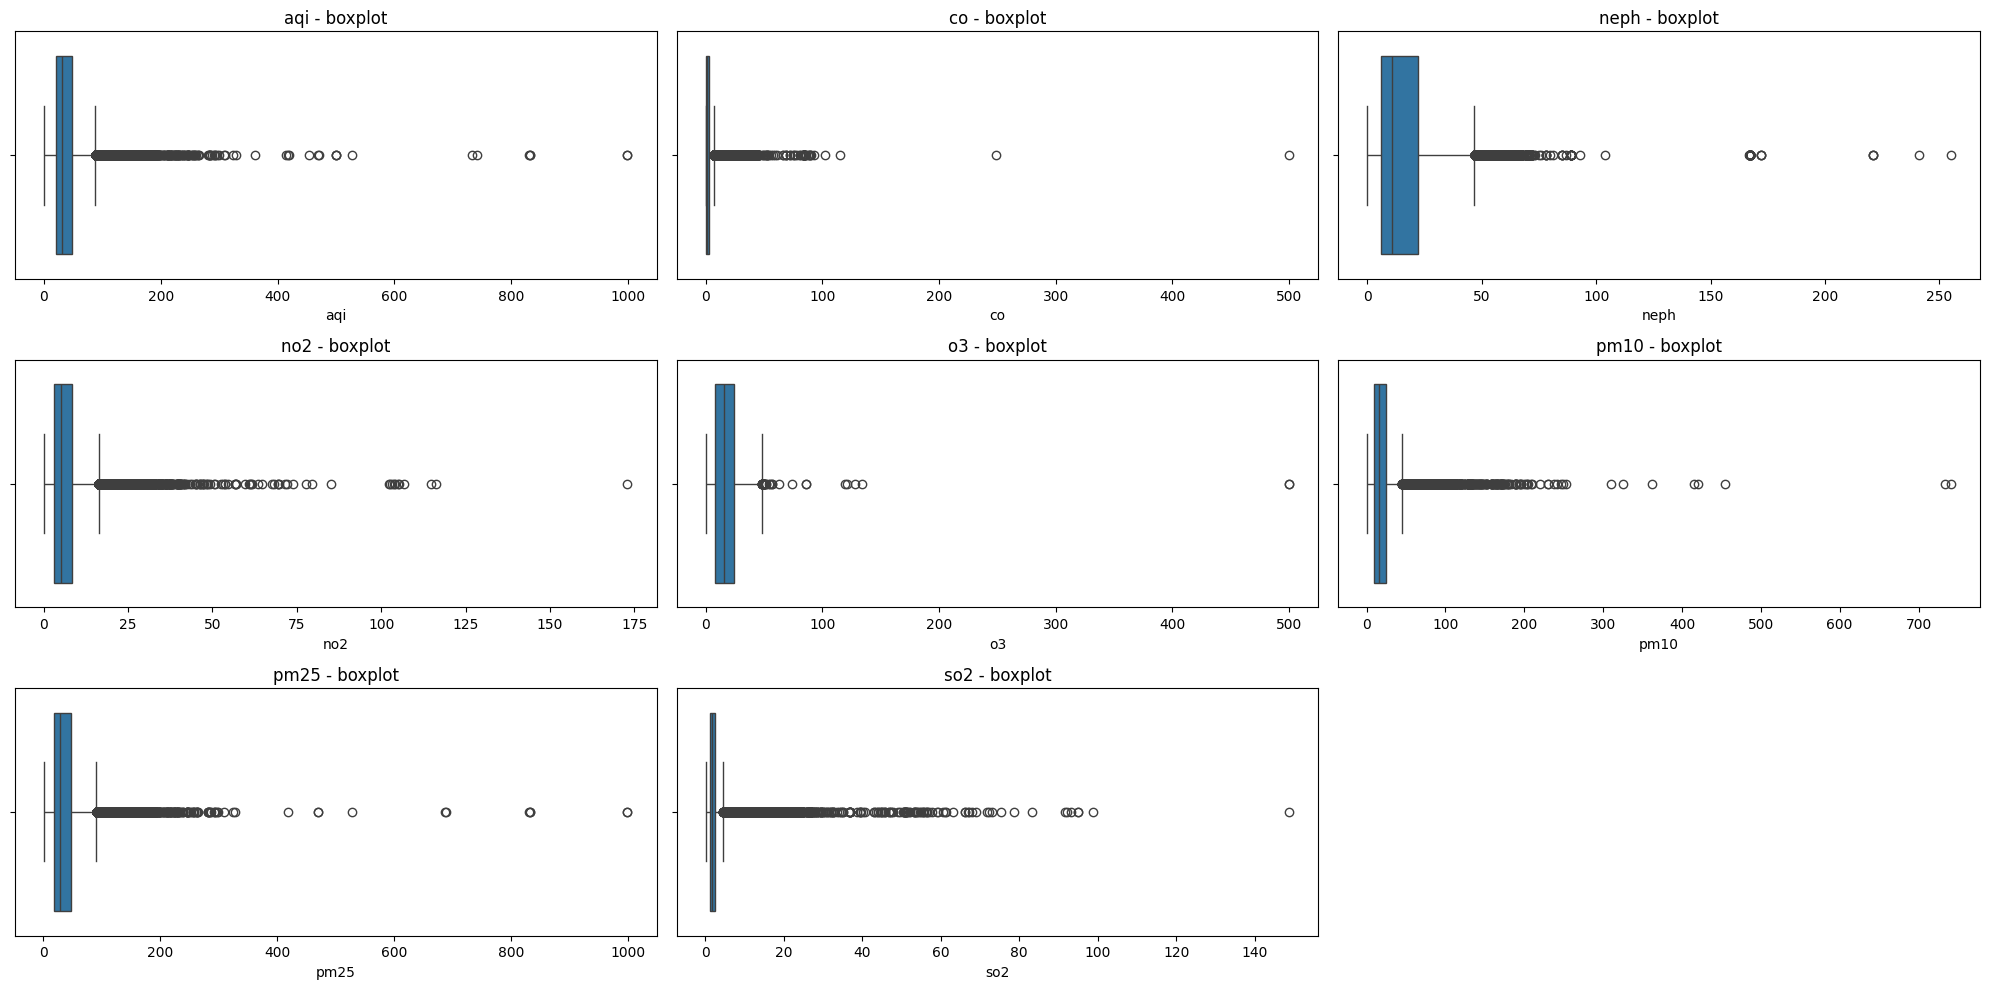

In [45]:
# Tracé des boxplots pour chaque colonne numérique
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
axs = axs.ravel()  # Aplatir la matrice de subplots en une liste

for i, column in enumerate(numeric_data.columns):
    sns.boxplot(x=numeric_data[column], ax=axs[i], orient='h')
    axs[i].set_title(f'{column} - boxplot')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('')

# Si il y a moins de subplots que d'axes, cacher les axes restants
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

**SIGNIFICATION DES DIFFERENTES VARIABLES DE NOTRE BASE DE DONNEES**

**1. Date :** La date à laquelle les mesures ont été prises.

**2. City :** La ville où les mesures ont été prises.

**3. Specie :** Le type de particules

***pm25 :*** Particulate Matter 2.5 (PM2.5) désigne les particules en suspension dans l'air d'un diamètre inférieur ou égal à 2.5 micromètres, associées à divers effets sur la santé humaine.

***no2*** : Le dioxyde d'azote (NO2) est un gaz nocif produit principalement par la combustion de carburants fossiles. Il est associé à des problèmes respiratoires et à la formation de smog.

***co*** : Le monoxyde de carbone (CO) est un gaz inodore et incolore produit par la combustion incomplète de carburants. Il est toxique pour les humains et peut être mortel à des concentrations élevées.

***pm10*** : Particulate Matter 10 (PM10) désigne les particules en suspension dans l'air d'un diamètre inférieur ou égal à 10 micromètres. Elles peuvent également affecter la santé humaine.

***o3*** : L'ozone (O3) est un gaz présent naturellement dans l'atmosphère. À des altitudes plus élevées, il forme la couche d'ozone qui protège la Terre des rayons ultraviolets nocifs. Cependant, au niveau du sol, l'ozone peut être un polluant atmosphérique nocif.

***so2*** : Le dioxyde de soufre (SO2) est un gaz incolore et irritant produit par la combustion de combustibles fossiles contenant du soufre. Il peut contribuer à la formation de pluies acides et aggraver les problèmes respiratoires.

***neph*** : Les néphélomètres mesurent la turbidité de l'air en détectant la diffusion de la lumière par les particules en suspension.

***aqi*** : L'Indice de Qualité de l'Air (AQI) est un indicateur normalisé de la qualité de l'air basé sur les niveaux de pollution atmosphérique. Il fournit des informations sur les effets potentiels sur la santé associés à différents niveaux de pollution.

**4. Country_Name :** Le nom du pays où les mesures ont été prises.

**5. Continent :** Le continent où se trouve le pays.

**EXPORTATION DE LA BASE DE DONNEES**

In [61]:
pivot_data.to_csv("database_quality_ofair.csv.gz", index=False,compression='gzip', encoding='utf-8')

In [63]:
pivot_data.columns

Index(['Date', 'City', 'Country_Name', 'Continent', 'aqi', 'co', 'neph', 'no2',
       'o3', 'pm10', 'pm25', 'so2', 'Categorie'],
      dtype='object', name='Specie')